Configuration loaded successfully!
Target Column: target
ID Column: id
Random Seed: 42
Cross-Validation Folds: 7
MACHINE LEARNING PIPELINE - COMPREHENSIVE EXECUTION

STEP 1: DATA LOADING AND INITIAL EXPLORATION
Loading datasets...
Initial shapes - Train: (21295, 121), Test: (7517, 120)
Training data columns: 121
Testing data columns: 120

Target variable statistics:
Mean: 11.7801
Std: 7.0858
Min: 0.0000
Max: 23.5913

STEP 2: DATA PROCESSING - OUTLIER HANDLING
BEFORE outlier handling:
Mean: 11.7801, Std: 7.0858
Range: [0.0000, 23.5913]

Outlier bounds: [-24.9384, 41.5641]
Number of outliers detected: 0

AFTER outlier handling:
Mean: 11.7801, Std: 7.0858
Range: [0.0000, 23.5913]
Mean change: 0.0000
Std change: 0.0000

STEP 3: EXPLORATORY DATA ANALYSIS
Generating target distribution plot...


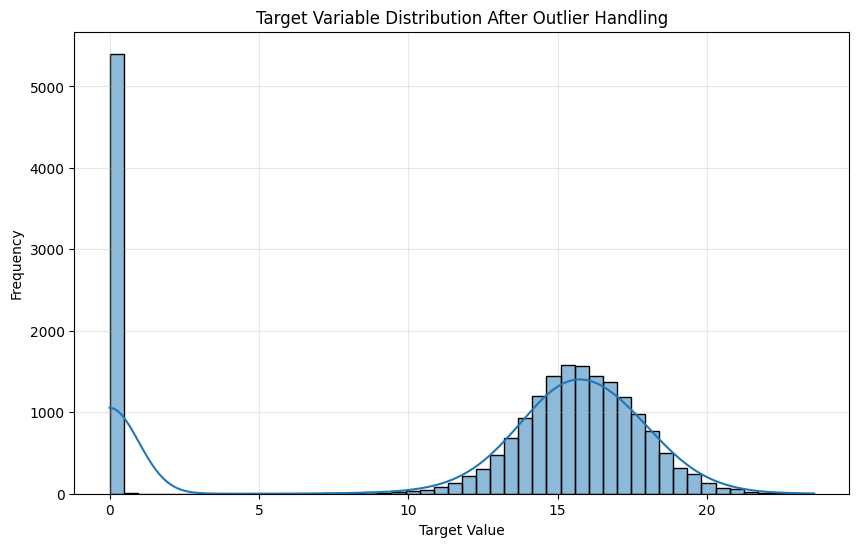


Analyzing correlations with target variable...

Top 50 correlations with target (limited for performance):
SND_MNTPRD_E    0.142015
FJU_CODFJU      0.135113
TVA_CRDFIN      0.118202
TVA_CRDINI      0.111631
CTR_ODTIMB      0.103982
BCT_CODBUR      0.095951
ADB_MNTORD      0.088459
TVA_RESTIT      0.071720
AX5_MNTMAR      0.069328
FAC_MNTPRI_C    0.067880
Name: target, dtype: float64


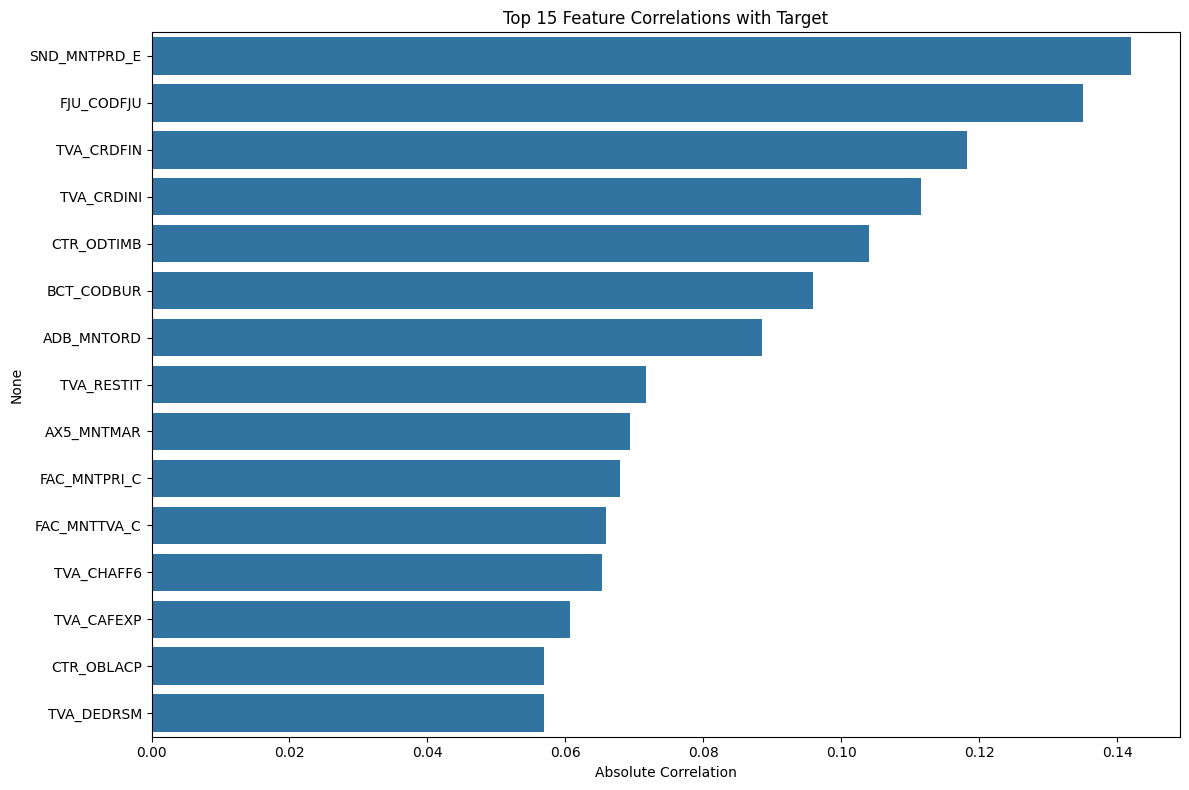


Analyzing missing values...
Missing Values (% of total):
SND_MNTDRC_E    94.219300
SND_MNTTAX_E    94.219300
SND_MNTTVA_E    94.219300
SND_MNTAVA_E    94.219300
SND_MNTPRD_E    94.219300
SND_MNTAIR_E    94.219300
SND_MNTPAY_E    94.219300
FAC_MNTPRI_F    91.453393
FAC_MNTDCO_F    91.453393
FAC_MNTTVA_F    91.453393
dtype: float64


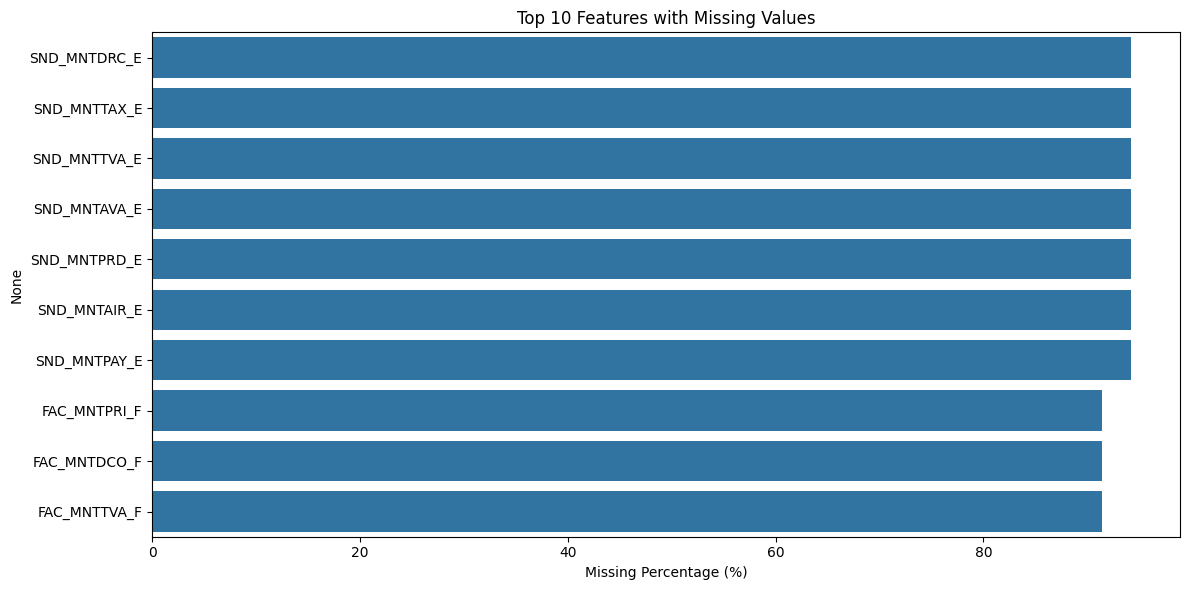


Analyzing categorical features...
Found 2 categorical features

Analyzing categorical feature: CTR_CATEGO_X
Unique values: 4
Top 5 categories: ['M', 'C', 'P', 'N']


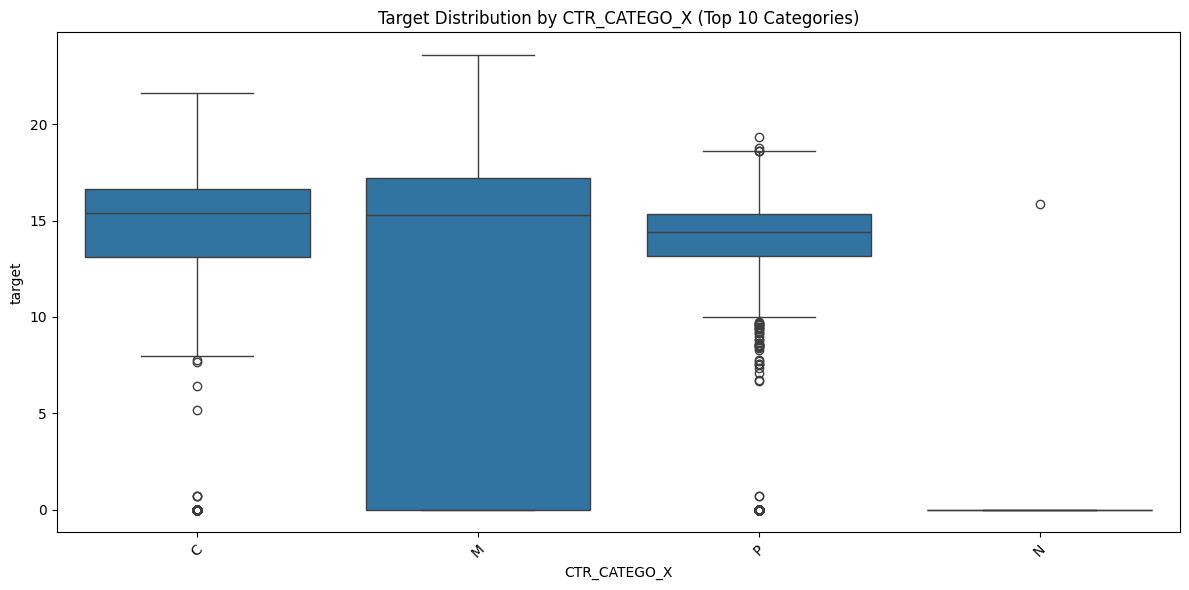


Analyzing categorical feature: id
Unique values: 21295
Top 5 categories: ['train_id8245', 'train_id17437', 'train_id5086', 'train_id1443', 'train_id15469']


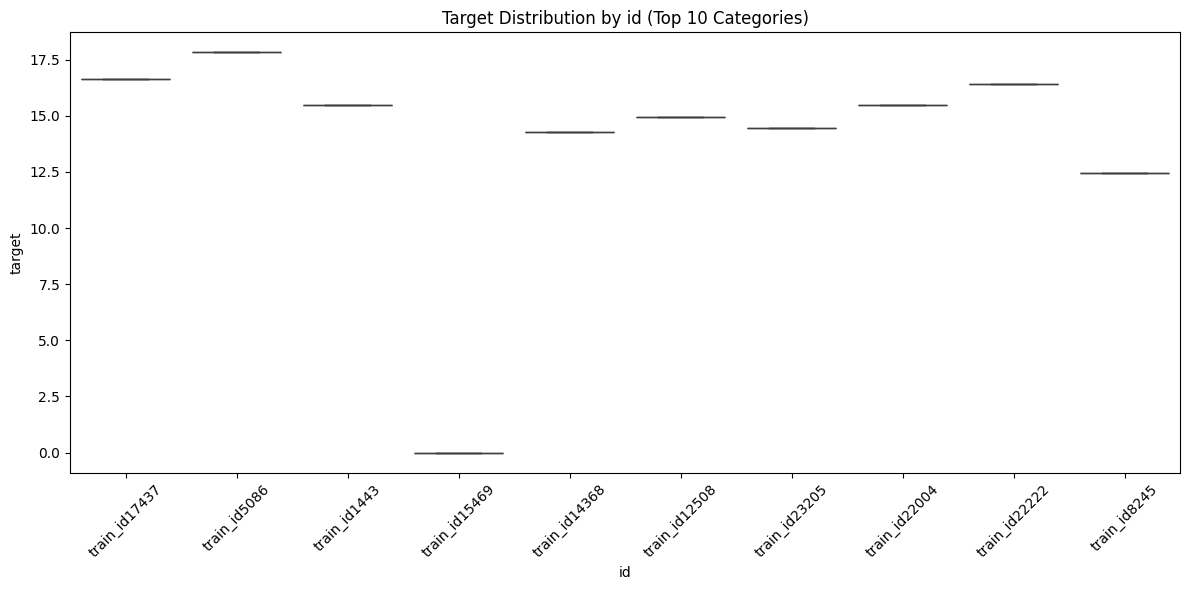


Dataset Summary:
Total features: 120
Numerical features: 118
Categorical features: 2
Total samples: 21295

STEP 4: DATA PROCESSING - MISSING VALUES & TRANSFORMATIONS
Combining train and test datasets for consistent preprocessing...
Added target column to test set (filled with NaN)
Combined dataset shape: (28812, 122)
Total missing values before processing: 934336

STEP 5: FEATURE ENGINEERING - TARGET ENCODING
Columns selected for target encoding: ['CTR_MATFIS', 'ACT_CODACT', 'BCT_CODBUR', 'CTR_CATEGO_X', 'FJU_CODFJU']
Train part shape: (21295, 122)
Test part shape: (7517, 122)

Processing CTR_MATFIS...
Applying target encoding to: CTR_MATFIS
  - Unique categories: 12387
  - Encoding range: [8.8323, 13.3714]

Processing ACT_CODACT...
Applying target encoding to: ACT_CODACT
  - Unique categories: 527
  - Encoding range: [4.1625, 16.6917]

Processing BCT_CODBUR...
Applying target encoding to: BCT_CODBUR
  - Unique categories: 158
  - Encoding range: [7.8046, 14.6886]

Processing CTR_CATE

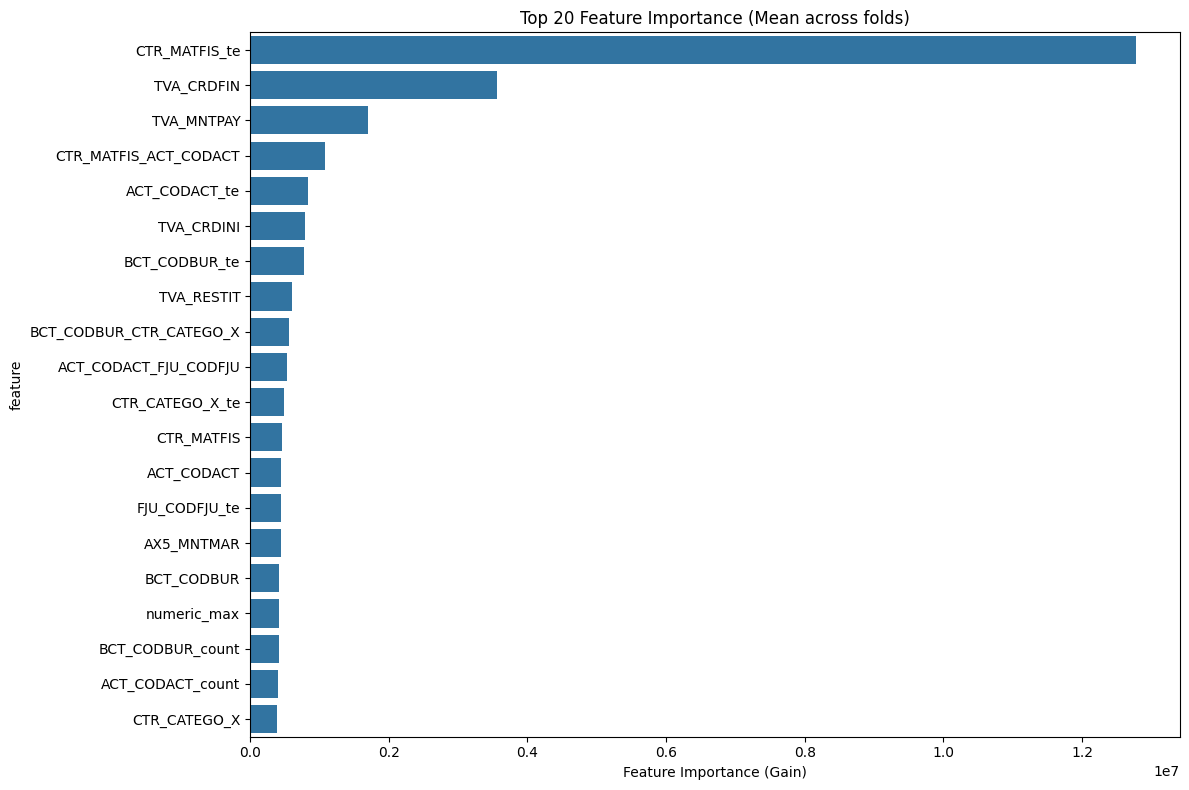


STEP 8: RESULTS COMPARISON AND EVALUATION
PERFORMANCE COMPARISON:
Baseline RMSE (using mean): 7.08561
Model RMSE (after preprocessing): 5.37810
Improvement: 1.70750
Improvement %: 24.10%

PREDICTION ANALYSIS:
True target range: [0.000, 23.591]
Predicted range: [-2.750, 22.584]
True target mean: 11.780
Predicted mean: 11.811

CROSS-VALIDATION STABILITY:
Mean CV RMSE: 5.37716
Std CV RMSE: 0.10045
CV Coefficient of Variation: 1.87%
✓ Model shows good stability across folds

RESIDUAL ANALYSIS:
Residual mean: -0.03098
Residual std: 5.37814
Residual range: [-20.572, 22.758]


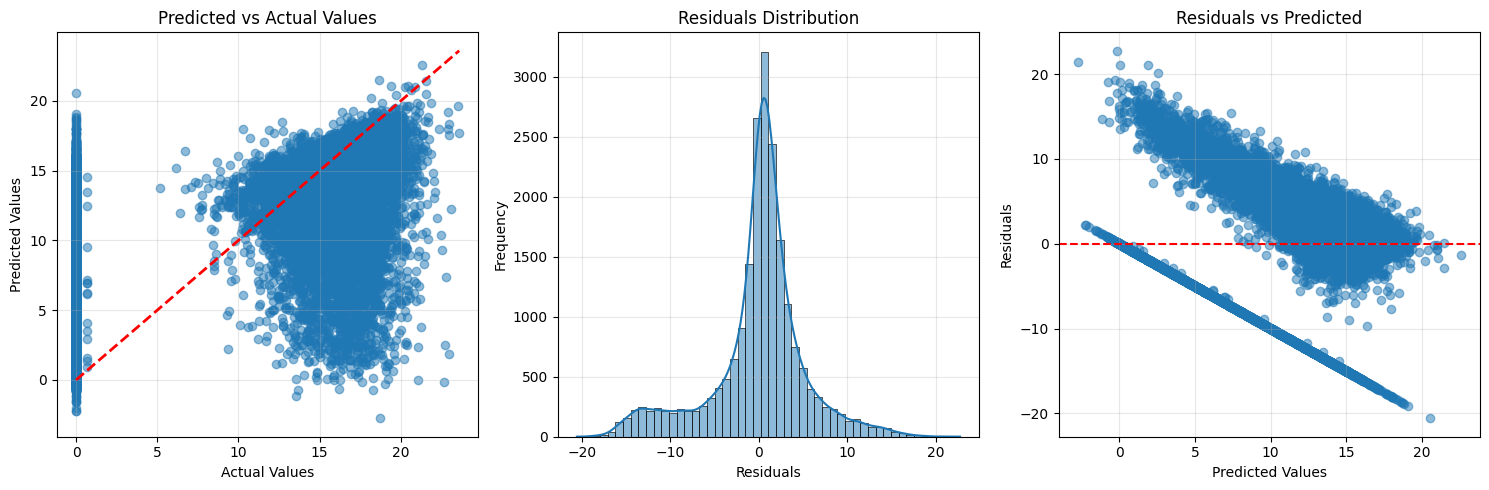


STEP 9: SUBMISSION GENERATION
Creating submission file...
Submission shape: (7517, 2)
Prediction statistics:
  Mean: 11.8496
  Std: 4.7568
  Min: 0.0000
  Max: 22.6338
  Range: [0.000, 22.634]
✓ No null predictions found
✓ No negative predictions found

✓ Submission saved as 'submission_enhanced.csv'

PIPELINE COMPLETED SUCCESSFULLY!
Final RMSE: 5.37810
Submission file: submission_enhanced.csv


In [2]:
# =============================================================================
# MACHINE LEARNING PIPELINE - COMPREHENSIVE IMPLEMENTATION
# =============================================================================

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold
from category_encoders import CatBoostEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION AND CONSTANTS
# =============================================================================

# Define global constants for consistent results
TARGET_COL = 'target'  # Target variable column name
ID_COL = 'id'          # ID column name
SEED = 42              # Random seed for reproducibility
N_FOLDS = 7            # Number of cross-validation folds

print("Configuration loaded successfully!")
print(f"Target Column: {TARGET_COL}")
print(f"ID Column: {ID_COL}")
print(f"Random Seed: {SEED}")
print(f"Cross-Validation Folds: {N_FOLDS}")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

def load_and_explore_data():
    """
    Load training and testing datasets and perform initial exploration
    """
    print("\n" + "="*50)
    print("STEP 1: DATA LOADING AND INITIAL EXPLORATION")
    print("="*50)
    
    # Load datasets
    print("Loading datasets...")
    train_df = pd.read_csv('Train.csv')
    test_df = pd.read_csv('Test.csv')
    
    # Display initial information
    print(f"Initial shapes - Train: {train_df.shape}, Test: {test_df.shape}")
    print(f"Training data columns: {len(train_df.columns)}")
    print(f"Testing data columns: {len(test_df.columns)}")
    
    # Basic statistics
    print(f"\nTarget variable statistics:")
    print(f"Mean: {train_df[TARGET_COL].mean():.4f}")
    print(f"Std: {train_df[TARGET_COL].std():.4f}")
    print(f"Min: {train_df[TARGET_COL].min():.4f}")
    print(f"Max: {train_df[TARGET_COL].max():.4f}")
    
    return train_df, test_df

# =============================================================================
# 2. DATA PROCESSING - OUTLIER HANDLING
# =============================================================================

def handle_outliers(train_df):
    """
    Handle outliers in the target variable using IQR method
    This addresses the outlier problem in the dataset
    """
    print("\n" + "="*50)
    print("STEP 2: DATA PROCESSING - OUTLIER HANDLING")
    print("="*50)
    
    # Store original target statistics for comparison
    original_mean = train_df[TARGET_COL].mean()
    original_std = train_df[TARGET_COL].std()
    original_min = train_df[TARGET_COL].min()
    original_max = train_df[TARGET_COL].max()
    
    print("BEFORE outlier handling:")
    print(f"Mean: {original_mean:.4f}, Std: {original_std:.4f}")
    print(f"Range: [{original_min:.4f}, {original_max:.4f}]")
    
    # Calculate IQR bounds for outlier detection
    Q1 = train_df[TARGET_COL].quantile(0.25)  # First quartile
    Q3 = train_df[TARGET_COL].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                             # Interquartile range
    
    # Define outlier bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nOutlier bounds: [{lower_bound:.4f}, {upper_bound:.4f}]")
    
    # Count outliers before handling
    outliers_count = ((train_df[TARGET_COL] < lower_bound) | 
                     (train_df[TARGET_COL] > upper_bound)).sum()
    print(f"Number of outliers detected: {outliers_count}")
    
    # Cap outliers to the bounds (Winsorization)
    train_df[TARGET_COL] = np.where(train_df[TARGET_COL] > upper_bound, upper_bound,
                                    np.where(train_df[TARGET_COL] < lower_bound, lower_bound, 
                                           train_df[TARGET_COL]))
    
    # Display statistics after outlier handling
    new_mean = train_df[TARGET_COL].mean()
    new_std = train_df[TARGET_COL].std()
    new_min = train_df[TARGET_COL].min()
    new_max = train_df[TARGET_COL].max()
    
    print("\nAFTER outlier handling:")
    print(f"Mean: {new_mean:.4f}, Std: {new_std:.4f}")
    print(f"Range: [{new_min:.4f}, {new_max:.4f}]")
    print(f"Mean change: {abs(new_mean - original_mean):.4f}")
    print(f"Std change: {abs(new_std - original_std):.4f}")
    
    return train_df

# =============================================================================
# 3. DATA EXPLORATION AND VISUALIZATION
# =============================================================================

def perform_exploratory_analysis(train_df, limit_features=50):
    """
    Perform comprehensive exploratory data analysis
    Args:
        train_df: Training dataframe
        limit_features: If True, limit analysis to top 50 most correlated features
    """
    print("\n" + "="*50)
    print("STEP 3: EXPLORATORY DATA ANALYSIS")
    print("="*50)
    
    # Target distribution visualization
    print("Generating target distribution plot...")
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[TARGET_COL], kde=True, bins=50)
    plt.title("Target Variable Distribution After Outlier Handling")
    plt.xlabel("Target Value")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Correlation analysis with numerical features
    print("\nAnalyzing correlations with target variable...")
    numerical_cols = train_df.select_dtypes(include=[np.number]).columns
    corr_with_target = train_df[numerical_cols].corr()[TARGET_COL].drop(TARGET_COL)
    
    # Limit to top features if requested
    if limit_features and len(corr_with_target) > limit_features:
        top_corr = corr_with_target.abs().sort_values(ascending=False).head(limit_features)
        print(f"\nTop {limit_features} correlations with target (limited for performance):")
    else:
        top_corr = corr_with_target.abs().sort_values(ascending=False)
        print(f"\nTop {min(10, len(top_corr))} correlations with target:")
    
    print(top_corr.head(10))
    
    # Visualize top correlations
    plt.figure(figsize=(12, 8))
    corr_to_plot = corr_with_target.abs().sort_values(ascending=False).head(15)
    sns.barplot(x=corr_to_plot.values, y=corr_to_plot.index)
    plt.title("Top 15 Feature Correlations with Target")
    plt.xlabel("Absolute Correlation")
    plt.tight_layout()
    plt.show()
    
    # Missing values analysis
    print("\nAnalyzing missing values...")
    missing_values = train_df.isnull().mean().sort_values(ascending=False) * 100
    missing_with_values = missing_values[missing_values > 0]
    
    if len(missing_with_values) > 0:
        print("Missing Values (% of total):")
        print(missing_with_values.head(10))
        
        # Visualize missing values
        if len(missing_with_values) > 0:
            plt.figure(figsize=(12, 6))
            sns.barplot(x=missing_with_values.head(10).values, 
                       y=missing_with_values.head(10).index)
            plt.title("Top 10 Features with Missing Values")
            plt.xlabel("Missing Percentage (%)")
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values found in the dataset!")
    
    # Categorical features analysis
    print("\nAnalyzing categorical features...")
    categorical_cols = train_df.select_dtypes(include='object').columns
    
    if len(categorical_cols) > 0:
        print(f"Found {len(categorical_cols)} categorical features")
        
        # Analyze first few categorical features
        for i, col in enumerate(categorical_cols[:2]):  # Limit to first 2 for performance
            print(f"\nAnalyzing categorical feature: {col}")
            print(f"Unique values: {train_df[col].nunique()}")
            print(f"Top 5 categories: {train_df[col].value_counts().head().index.tolist()}")
            
            # Box plot for categorical vs target
            plt.figure(figsize=(12, 6))
            # Limit categories for visualization
            top_categories = train_df[col].value_counts().head(10).index
            plot_data = train_df[train_df[col].isin(top_categories)]
            
            sns.boxplot(x=col, y=TARGET_COL, data=plot_data)
            plt.title(f"Target Distribution by {col} (Top 10 Categories)")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("No categorical features found!")
    
    # Dataset shape summary
    print(f"\nDataset Summary:")
    print(f"Total features: {len(train_df.columns) - 1}")  # Excluding target
    print(f"Numerical features: {len(numerical_cols) - 1}")  # Excluding target
    print(f"Categorical features: {len(categorical_cols)}")
    print(f"Total samples: {len(train_df)}")

# =============================================================================
# 4. DATA PROCESSING - MISSING VALUES AND TRANSFORMATIONS
# =============================================================================

def prepare_datasets_for_modeling(train_df, test_df):
    """
    Prepare datasets by combining train/test and handling missing values
    This addresses the missing values problem in the dataset
    """
    print("\n" + "="*50)
    print("STEP 4: DATA PROCESSING - MISSING VALUES & TRANSFORMATIONS")
    print("="*50)
    
    # Combine datasets for consistent preprocessing
    print("Combining train and test datasets for consistent preprocessing...")
    train_df['is_test'] = 0  # Flag to identify training data
    test_df['is_test'] = 1   # Flag to identify testing data
    
    # Ensure test set has target column (filled with NaN)
    if TARGET_COL not in test_df.columns:
        test_df[TARGET_COL] = np.nan
        print("Added target column to test set (filled with NaN)")
    
    # Combine datasets
    combined = pd.concat([train_df, test_df], ignore_index=True)
    print(f"Combined dataset shape: {combined.shape}")
    
    # Analyze missing values in combined dataset
    missing_before = combined.isnull().sum().sum()
    print(f"Total missing values before processing: {missing_before}")
    
    return combined

# =============================================================================
# 5. FEATURE ENGINEERING - TARGET ENCODING
# =============================================================================

def apply_target_encoding(combined):
    """
    Apply smooth target encoding to categorical variables
    This is a sophisticated method to handle categorical variables
    """
    print("\n" + "="*50)
    print("STEP 5: FEATURE ENGINEERING - TARGET ENCODING")
    print("="*50)
    
    def smooth_target_encoding(df_train, df_test, col, target, alpha=15, noise=0.005):
        """
        Apply smooth target encoding with cross-validation to prevent overfitting
        
        Args:
            df_train: Training dataframe
            df_test: Testing dataframe  
            col: Column to encode
            target: Target variable
            alpha: Smoothing parameter
            noise: Noise to add for regularization
        """
        print(f"Applying target encoding to: {col}")
        
        # Calculate global mean for smoothing
        global_mean = df_train[target].mean()
        col_te = f'{col}_te'  # Target encoded column name
        df_train[col_te] = np.nan
        
        # Use cross-validation for target encoding to prevent overfitting
        kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)
        
        for fold, (train_idx, valid_idx) in enumerate(kf.split(df_train)):
            # Calculate statistics on training fold
            fold_train = df_train.iloc[train_idx]
            stats = fold_train.groupby(col)[target].agg(['mean', 'count'])
            
            # Apply smoothing: (category_mean * count + global_mean * alpha) / (count + alpha)
            smooth_encoded = ((stats['mean'] * stats['count'] + global_mean * alpha) / 
                            (stats['count'] + alpha))
            
            # Add small noise for regularization
            noise_array = np.random.normal(0, noise, len(valid_idx))
            
            # Apply encoding to validation fold
            valid_indices = df_train.index[valid_idx]
            encoded_values = df_train.iloc[valid_idx][col].map(smooth_encoded)
            df_train.loc[valid_indices, col_te] = encoded_values + noise_array
        
        # Fill any remaining NaN values with global mean
        df_train[col_te].fillna(global_mean, inplace=True)
        
        # Encode test set using full training data statistics
        full_stats = df_train.groupby(col)[target].agg(['mean', 'count'])
        smooth_test = ((full_stats['mean'] * full_stats['count'] + global_mean * alpha) / 
                      (full_stats['count'] + alpha))
        df_test[col_te] = df_test[col].map(smooth_test).fillna(global_mean)
        
        print(f"  - Unique categories: {df_train[col].nunique()}")
        print(f"  - Encoding range: [{df_train[col_te].min():.4f}, {df_train[col_te].max():.4f}]")
        
        return df_train, df_test
    
    # Define columns for target encoding
    encoding_cols = ['CTR_MATFIS', 'ACT_CODACT', 'BCT_CODBUR', 'CTR_CATEGO_X', 'FJU_CODFJU']
    print(f"Columns selected for target encoding: {encoding_cols}")
    
    # Split combined data back to train and test
    train_part = combined[combined['is_test'] == 0].copy()
    test_part = combined[combined['is_test'] == 1].copy()
    
    print(f"Train part shape: {train_part.shape}")
    print(f"Test part shape: {test_part.shape}")
    
    # Apply target encoding to each categorical column
    encoded_features = []
    for col in encoding_cols:
        if col in combined.columns:
            print(f"\nProcessing {col}...")
            train_part, test_part = smooth_target_encoding(train_part, test_part, col, TARGET_COL)
            encoded_features.append(f'{col}_te')
        else:
            print(f"Warning: Column {col} not found in dataset")
    
    print(f"\nTarget encoding completed! Created {len(encoded_features)} new features:")
    for feature in encoded_features:
        print(f"  - {feature}")
    
    # Recombine the datasets
    combined = pd.concat([train_part, test_part], ignore_index=True)
    print(f"Final combined shape after target encoding: {combined.shape}")
    
    return combined

# =============================================================================
# 6. FEATURE ENGINEERING - ADVANCED FEATURES
# =============================================================================

def create_advanced_features(df):
    """
    Create advanced engineered features including ratios, interactions, and aggregations
    """
    print("\n" + "="*50)
    print("STEP 6: FEATURE ENGINEERING - ADVANCED FEATURES")
    print("="*50)
    
    initial_features = len(df.columns)
    print(f"Starting with {initial_features} features")
    
    # 1. Categorical Feature Interactions and Counts
    print("\n1. Creating categorical feature interactions...")
    encoding_cols = ['CTR_MATFIS', 'ACT_CODACT', 'BCT_CODBUR', 'CTR_CATEGO_X', 'FJU_CODFJU']
    
    for col in encoding_cols:
        if col in df.columns:
            # Count frequency of each category
            df[f'{col}_count'] = df.groupby(col)[col].transform('count')
            # Number of unique values (constant for each category but useful for model)
            df[f'{col}_nunique'] = df.groupby(col)[col].transform('nunique')
            print(f"  - Created count and nunique features for {col}")
    
    # 2. Financial Ratio Features
    print("\n2. Creating financial ratio features...")
    ratio_features_created = 0
    
    # Define base amount columns and their related columns for ratio calculation
    for prefix in ['FAC_', '']:  # With and without 'FAC_' prefix
        for transaction_type in ['F', 'C']:  # F and C transaction types
            base_col = f'{prefix}MNTPRI_{transaction_type}'  # Base amount column
            
            if base_col in df.columns:
                print(f"  Processing base column: {base_col}")
                
                # Related financial columns for ratio calculation
                for suffix in ['MFODEC', 'MNTDCO', 'MNTTVA']:
                    target_col = f'{prefix}{suffix}_{transaction_type}'
                    
                    if target_col in df.columns:
                        # Simple ratio (avoid division by zero)
                        df[f'{target_col}_ratio'] = df[target_col] / (df[base_col] + 1e-6)
                        
                        # Log ratio for handling skewed distributions
                        df[f'{target_col}_log_ratio'] = (np.log1p(df[target_col]) / 
                                                        (np.log1p(df[base_col]) + 1e-6))
                        
                        # Difference feature
                        df[f'{target_col}_diff'] = df[target_col] - df[base_col]
                        
                        ratio_features_created += 3
                        print(f"    - Created 3 ratio features for {target_col}")
    
    print(f"  Total ratio features created: {ratio_features_created}")
    
    # 3. Categorical Feature Interactions
    print("\n3. Creating categorical feature pair interactions...")
    interaction_pairs = [
        ('BCT_CODBUR', 'CTR_CATEGO_X'),
        ('ACT_CODACT', 'FJU_CODFJU'),
        ('CTR_MATFIS', 'ACT_CODACT'),
        ('CTR_MATFIS', 'BCT_CODBUR'),
        ('CTR_CATEGO_X', 'FJU_CODFJU')
    ]
    
    interactions_created = 0
    for col1, col2 in interaction_pairs:
        if col1 in df.columns and col2 in df.columns:
            # Create interaction by concatenating values
            interaction_name = f'{col1}_{col2}'
            df[interaction_name] = (df[col1].astype(str) + "_" + df[col2].astype(str))
            interactions_created += 1
            print(f"  - Created interaction: {interaction_name}")
    
    print(f"  Total interaction features created: {interactions_created}")
    
    # 4. Numerical Feature Aggregations
    print("\n4. Creating numerical feature aggregations...")
    
    # Get all numerical columns (excluding target, ID, and flags)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.difference([TARGET_COL, ID_COL])
    
    if len(numerical_cols) > 0:
        # Statistical aggregations across all numerical features
        df['numeric_sum'] = df[numerical_cols].sum(axis=1)
        df['numeric_mean'] = df[numerical_cols].mean(axis=1)
        df['numeric_std'] = df[numerical_cols].std(axis=1)
        df['numeric_max'] = df[numerical_cols].max(axis=1)
        df['numeric_min'] = df[numerical_cols].min(axis=1)
        df['numeric_range'] = df['numeric_max'] - df['numeric_min']
        
        aggregation_features = 6
        print(f"  - Created {aggregation_features} numerical aggregation features")
        print(f"  - Aggregated across {len(numerical_cols)} numerical columns")
    
    # 5. Missing Value Indicators
    print("\n5. Creating missing value indicators...")
    missing_indicators = []
    
    # Create missing value indicators for columns with missing data
    for col in df.columns:
        if df[col].isna().sum() > 0:
            missing_col_name = f'{col}_missing'
            df[missing_col_name] = df[col].isna().astype(int)
            missing_indicators.append(missing_col_name)
    
    # Create total missing count feature
    if missing_indicators:
        df['total_missing'] = df[missing_indicators].sum(axis=1)
        missing_indicators.append('total_missing')
        print(f"  - Created {len(missing_indicators)} missing value indicator features")
    else:
        print("  - No missing values found, no indicators created")
    
    # 6. Handle remaining missing values
    print("\n6. Handling remaining missing values...")
    missing_before = df.isnull().sum().sum()
    print(f"  Missing values before filling: {missing_before}")
    
    # Fill all remaining missing values with a specific value (-999)
    df.fillna(-999, inplace=True)
    
    missing_after = df.isnull().sum().sum()
    print(f"  Missing values after filling: {missing_after}")
    
    # Summary of feature engineering
    final_features = len(df.columns)
    new_features = final_features - initial_features
    
    print(f"\nFeature Engineering Summary:")
    print(f"  - Initial features: {initial_features}")
    print(f"  - Final features: {final_features}")
    print(f"  - New features created: {new_features}")
    
    return df

# =============================================================================
# 7. MODEL IMPLEMENTATION AND TRAINING
# =============================================================================

def train_lightgbm_model(combined):
    """
    Train LightGBM model with cross-validation
    """
    print("\n" + "="*50)
    print("STEP 7: MODEL IMPLEMENTATION AND TRAINING")
    print("="*50)
    
    # Prepare final datasets
    print("Preparing datasets for modeling...")
    train_final = combined[combined['is_test'] == 0].copy()
    test_final = combined[combined['is_test'] == 1].copy()
    
    # Define target and features
    y = train_final[TARGET_COL]
    feature_cols = [col for col in train_final.columns 
                   if col not in [TARGET_COL, ID_COL, 'is_test']]
    X = train_final[feature_cols]
    X_test = test_final[feature_cols]
    
    print(f"Training set shape: {X.shape}")
    print(f"Test set shape: {X_test.shape}")
    print(f"Number of features: {len(feature_cols)}")
    
    # Identify categorical columns for proper encoding
    cat_cols = X.select_dtypes(include='object').columns.tolist()
    print(f"Categorical columns for encoding: {len(cat_cols)}")
    
    # LightGBM parameters - optimized for regression
    params = {
        'objective': 'regression',        # Regression task
        'metric': 'rmse',                # Root Mean Square Error
        'boosting_type': 'gbdt',         # Gradient Boosting Decision Tree
        'learning_rate': 0.008,          # Low learning rate for better generalization
        'num_leaves': 80,                # Number of leaves in each tree
        'min_data_in_leaf': 25,          # Minimum samples in leaf (prevents overfitting)
        'max_depth': 8,                  # Maximum tree depth
        'lambda_l1': 1.5,                # L1 regularization
        'lambda_l2': 1.5,                # L2 regularization
        'feature_fraction': 0.85,        # Fraction of features used per tree
        'bagging_fraction': 0.85,        # Fraction of data used per tree
        'bagging_freq': 1,               # Frequency of bagging
        'min_gain_to_split': 0.01,       # Minimum gain required for split
        'max_bin': 300,                  # Maximum number of bins for features
        'seed': SEED,                    # Random seed
        'verbosity': -1,                 # Suppress output
        'force_col_wise': True,          # Force column-wise histogram building
    }
    
    print("LightGBM Parameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")
    
    # Initialize arrays for predictions and feature importance
    oof_preds = np.zeros(len(X))           # Out-of-fold predictions
    test_preds = np.zeros(len(X_test))     # Test predictions
    feature_importance = pd.DataFrame()     # Feature importance storage
    
    # Cross-validation setup
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)
    fold_scores = []
    
    print(f"\nStarting {N_FOLDS}-fold cross-validation...")
    
    # Training loop for each fold
    for fold, (train_idx, valid_idx) in enumerate(kf.split(X), 1):
        print(f"\n--- Fold {fold}/{N_FOLDS} ---")
        
        # Split data for current fold
        X_train, X_valid = X.iloc[train_idx].copy(), X.iloc[valid_idx].copy()
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        print(f"Train size: {len(X_train)}, Validation size: {len(X_valid)}")
        
        # Apply categorical encoding if categorical columns exist
        if cat_cols:
            print(f"Applying CatBoost encoding to {len(cat_cols)} categorical columns...")
            cbe = CatBoostEncoder(cols=cat_cols, random_state=SEED + fold)
            
            # Fit encoder on training data and transform both train and validation
            X_train[cat_cols] = cbe.fit_transform(X_train[cat_cols], y_train)
            X_valid[cat_cols] = cbe.transform(X_valid[cat_cols])
            
            # Transform test data with the same encoder
            X_test_fold = X_test.copy()
            X_test_fold[cat_cols] = cbe.transform(X_test_fold[cat_cols])
        else:
            X_test_fold = X_test.copy()
        
        # Create LightGBM datasets
        train_set = lgb.Dataset(X_train, y_train)
        valid_set = lgb.Dataset(X_valid, y_valid)
        
        # Train model
        print("Training LightGBM model...")
        model = lgb.train(
            params,
            train_set,
            num_boost_round=50000,        # Maximum number of iterations
            valid_sets=[valid_set],       # Validation set for early stopping
            callbacks=[
                lgb.early_stopping(800),  # Stop if no improvement for 800 rounds
                lgb.log_evaluation(1000)  # Print progress every 1000 rounds
            ]
        )
        
        print(f"Best iteration: {model.best_iteration}")
        
        # Make predictions
        oof_preds[valid_idx] = model.predict(X_valid, num_iteration=model.best_iteration)
        test_preds += model.predict(X_test_fold, num_iteration=model.best_iteration) / N_FOLDS
        
        # Store feature importance
        imp_df = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importance(importance_type='gain'),
            'fold': fold
        })
        feature_importance = pd.concat([feature_importance, imp_df])
        
        # Calculate fold RMSE
        fold_rmse = np.sqrt(np.mean((y_valid - oof_preds[valid_idx]) ** 2))
        fold_scores.append(fold_rmse)
        print(f"Fold {fold} RMSE: {fold_rmse:.5f}")
    
    # Calculate overall performance
    oof_rmse = np.sqrt(np.mean((y - oof_preds) ** 2))
    print(f"\n{'='*50}")
    print("CROSS-VALIDATION RESULTS")
    print(f"{'='*50}")
    print(f"Overall OOF RMSE: {oof_rmse:.5f}")
    print(f"Fold RMSE scores: {[f'{score:.5f}' for score in fold_scores]}")
    print(f"Mean Fold RMSE: {np.mean(fold_scores):.5f}")
    print(f"Std Fold RMSE: {np.std(fold_scores):.5f}")
    
    # Feature importance analysis
    print(f"\n{'='*30}")
    print("FEATURE IMPORTANCE ANALYSIS")
    print(f"{'='*30}")
    
    imp_summary = (feature_importance.groupby('feature')['importance']
                   .agg(['mean', 'std'])
                   .sort_values(by='mean', ascending=False))
    
    print("Top 10 Most Important Features:")
    print(imp_summary.head(10))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = imp_summary.head(20)
    sns.barplot(x=top_features['mean'], y=top_features.index)
    plt.title("Top 20 Feature Importance (Mean across folds)")
    plt.xlabel("Feature Importance (Gain)")
    plt.tight_layout()
    plt.show()
    
    return oof_preds, test_preds, oof_rmse, fold_scores, imp_summary

# =============================================================================
# 8. RESULTS COMPARISON AND EVALUATION
# =============================================================================

def compare_results(train_df, oof_preds, oof_rmse, fold_scores):
    """
    Compare results before and after preprocessing
    """
    print("\n" + "="*50)
    print("STEP 8: RESULTS COMPARISON AND EVALUATION")
    print("="*50)
    
    # Calculate baseline RMSE (using mean as prediction)
    y_true = train_df[TARGET_COL]
    mean_prediction = y_true.mean()
    baseline_rmse = np.sqrt(np.mean((y_true - mean_prediction) ** 2))
    
    print("PERFORMANCE COMPARISON:")
    print(f"{'='*40}")
    print(f"Baseline RMSE (using mean): {baseline_rmse:.5f}")
    print(f"Model RMSE (after preprocessing): {oof_rmse:.5f}")
    print(f"Improvement: {baseline_rmse - oof_rmse:.5f}")
    print(f"Improvement %: {((baseline_rmse - oof_rmse) / baseline_rmse * 100):.2f}%")
    
    # Prediction analysis
    print(f"\nPREDICTION ANALYSIS:")
    print(f"{'='*40}")
    print(f"True target range: [{y_true.min():.3f}, {y_true.max():.3f}]")
    print(f"Predicted range: [{oof_preds.min():.3f}, {oof_preds.max():.3f}]")
    print(f"True target mean: {y_true.mean():.3f}")
    print(f"Predicted mean: {oof_preds.mean():.3f}")
    
    # Cross-validation stability
    cv_mean = np.mean(fold_scores)
    cv_std = np.std(fold_scores)
    print(f"\nCROSS-VALIDATION STABILITY:")
    print(f"{'='*40}")
    print(f"Mean CV RMSE: {cv_mean:.5f}")
    print(f"Std CV RMSE: {cv_std:.5f}")
    print(f"CV Coefficient of Variation: {(cv_std/cv_mean*100):.2f}%")
    
    if cv_std / cv_mean < 0.05:
        print("✓ Model shows good stability across folds")
    else:
        print("⚠ Model shows some instability across folds")
    
    # Residual analysis
    residuals = y_true - oof_preds
    print(f"\nRESIDUAL ANALYSIS:")
    print(f"{'='*40}")
    print(f"Residual mean: {residuals.mean():.5f}")
    print(f"Residual std: {residuals.std():.5f}")
    print(f"Residual range: [{residuals.min():.3f}, {residuals.max():.3f}]")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Predicted vs Actual
    plt.subplot(1, 3, 1)
    plt.scatter(y_true, oof_preds, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Residuals distribution
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True, bins=50)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Distribution')
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Residuals vs Predicted
    plt.subplot(1, 3, 3)
    plt.scatter(oof_preds, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# =============================================================================
# 9. SUBMISSION GENERATION
# =============================================================================

def generate_submission(test_final, test_preds):
    """
    Generate final submission file
    """
    print("\n" + "="*50)
    print("STEP 9: SUBMISSION GENERATION")
    print("="*50)
    
    # Create submission dataframe
    print("Creating submission file...")
    submission = pd.DataFrame({
        ID_COL: test_final[ID_COL],
        TARGET_COL: np.clip(test_preds, 0, None)  # Clip negative predictions to 0
    })
    
    # Submission statistics
    print(f"Submission shape: {submission.shape}")
    print(f"Prediction statistics:")
    print(f"  Mean: {submission[TARGET_COL].mean():.4f}")
    print(f"  Std: {submission[TARGET_COL].std():.4f}")
    print(f"  Min: {submission[TARGET_COL].min():.4f}")
    print(f"  Max: {submission[TARGET_COL].max():.4f}")
    print(f"  Range: [{submission[TARGET_COL].min():.3f}, {submission[TARGET_COL].max():.3f}]")
    
    # Check for any issues
    if submission[TARGET_COL].isnull().sum() > 0:
        print(f"⚠ Warning: {submission[TARGET_COL].isnull().sum()} null predictions found!")
    else:
        print("✓ No null predictions found")
    
    if (submission[TARGET_COL] < 0).sum() > 0:
        print(f"⚠ Warning: {(submission[TARGET_COL] < 0).sum()} negative predictions clipped to 0")
    else:
        print("✓ No negative predictions found")
    
    # Save submission
    submission_filename = 'submission_enhanced.csv'
    submission.to_csv(submission_filename, index=False)
    print(f"\n✓ Submission saved as '{submission_filename}'")
    
    return submission

# =============================================================================
# DIRECT EXECUTION - NO MAIN FUNCTION
# =============================================================================

print("="*60)
print("MACHINE LEARNING PIPELINE - COMPREHENSIVE EXECUTION")
print("="*60)

try:
    # Step 1: Load and explore data
    train_df, test_df = load_and_explore_data()
    
    # Step 2: Handle outliers
    train_df = handle_outliers(train_df)
    
    # Step 3: Exploratory Data Analysis
    # Analyze only top 50 features for performance - does NOT affect RMSE
    perform_exploratory_analysis(train_df, limit_features=50)
    
    # Step 4: Prepare datasets
    combined = prepare_datasets_for_modeling(train_df, test_df)
    
    # Step 5: Apply target encoding
    combined = apply_target_encoding(combined)
    
    # Step 6: Create advanced features
    combined = create_advanced_features(combined)
    
    # Step 7: Train model
    oof_preds, test_preds, oof_rmse, fold_scores, imp_summary = train_lightgbm_model(combined)
    
    # Step 8: Compare results
    compare_results(train_df, oof_preds, oof_rmse, fold_scores)
    
    # Step 9: Generate submission
    test_final = combined[combined['is_test'] == 1].copy()
    submission = generate_submission(test_final, test_preds)
    
    print("\n" + "="*60)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*60)
    print(f"Final RMSE: {oof_rmse:.5f}")
    print(f"Submission file: submission_enhanced.csv")
    print("="*60)
    
    # Store results for further analysis if needed
    pipeline_results = {
        'oof_rmse': oof_rmse,
        'fold_scores': fold_scores,
        'feature_importance': imp_summary,
        'submission': submission
    }
    
except Exception as e:
    print(f"\n❌ Pipeline failed with error: {str(e)}")
    print("Please check the error and try again.")
    raise e